In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 150
pd.options.display.max_rows = 3000
pd.options.display.max_colwidth = 200

In [2]:
bos_pre19 = pd.read_csv('./data/boston_listings.csv')
bos_pos19 = pd.read_csv('./data/102420_boston_listings.csv')

In [3]:
bos_pre19.head(1)

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_dict,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...",Guests solely occupy the 1 floor apartment with its own front entrance off common hallway and private back door opening to gated parking area.,We sometimes travel. Always available via: mobile phone (voice and texting) and internet. Backup contact provided when not available.,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,100%,44%,t,East Boston,5,"['email', 'phone', 'reviews']",f,East Boston,East Boston,2128,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$125.00,$75.00,11,20,20,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28


In [4]:
bos_pre19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3845 non-null   int64  
 1   name                         3845 non-null   object 
 2   summary                      3765 non-null   object 
 3   access                       2208 non-null   object 
 4   interaction                  2589 non-null   object 
 5   house_rules                  2855 non-null   object 
 6   host_id                      3845 non-null   int64  
 7   host_since                   3845 non-null   object 
 8   host_location                3842 non-null   object 
 9   host_response_time           3283 non-null   object 
 10  host_response_rate           3283 non-null   object 
 11  host_acceptance_rate         3585 non-null   object 
 12  host_is_superhost            3845 non-null   object 
 13  host_neighbourhood

In [5]:
bos_pos19.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20201024170420,2020-10-24,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...","Mostly quiet ( no loud music, no crowed sidewalks) area with residential 3 story buildings, some 4 and 5 story newer buildings. Though not in an ""entertainment"" area there are local food shops an...",https://a0.muscache.com/pictures/24670/b2de0442_original.jpg,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently occupy the spaces that we rent and as such try to make the spaces pleasant and appealing to ourselves as well as guests. We have been subletting for o...,within a day,90%,29%,f,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_x_medium,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Cable TV"", ""Shampoo"", ""Smoke alarm"", ""TV"", ""Bed linens"", ""Free street parking"", ""Hangers"", ""Patio or balcony"", ""Carbon monoxide alarm"", ""Iron"", ""Extra pillows and blankets"", ""Wifi"", ""Oven"", ""Dry...",$150.00,28,1125,28.0,28.0,1125.0,1125.0,28.0,1125.0,NaN,t,0,3,33,123,2020-10-24,17,2,0,2015-07-10,2020-09-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26


In [6]:
bos_pre19.isnull().sum()

id                                0
name                              0
summary                          80
access                         1637
interaction                    1256
house_rules                     990
host_id                           0
host_since                        0
host_location                     3
host_response_time              562
host_response_rate              562
host_acceptance_rate            260
host_is_superhost                 0
host_neighbourhood              221
host_total_listings_count         0
host_verifications                0
host_identity_verified            0
neighbourhood                     0
neighbourhood_cleansed            0
zipcode                          14
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         3
bedrooms                    

In [7]:
bos_pos19.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                       28
neighborhood_overview                            996
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      4
host_about                                      1122
host_response_time                               662
host_response_rate                               662
host_acceptance_rate                             432
host_is_superhost                                  0
host_thumbnail_url                            

In [8]:
bos_pre19['dataset'] = 'pre-covid'

In [9]:
bos_pos19['dataset'] = 'post-covid'

In [10]:
bos_pos19.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,dataset
0,3781,https://www.airbnb.com/rooms/3781,20201024170420,2020-10-24,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...","Mostly quiet ( no loud music, no crowed sidewalks) area with residential 3 story buildings, some 4 and 5 story newer buildings. Though not in an ""entertainment"" area there are local food shops an...",https://a0.muscache.com/pictures/24670/b2de0442_original.jpg,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently occupy the spaces that we rent and as such try to make the spaces pleasant and appealing to ourselves as well as guests. We have been subletting for o...,within a day,90%,29%,f,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_x_medium,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Cable TV"", ""Shampoo"", ""Smoke alarm"", ""TV"", ""Bed linens"", ""Free street parking"", ""Hangers"", ""Patio or balcony"", ""Carbon monoxide alarm"", ""Iron"", ""Extra pillows and blankets"", ""Wifi"", ""Oven"", ""Dry...",$150.00,28,1125,28.0,28.0,1125.0,1125.0,28.0,1125.0,NaN,t,0,3,33,123,2020-10-24,17,2,0,2015-07-10,2020-09-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26,post-covid


In [11]:
bos_pos19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3254 non-null   int64  
 1   listing_url                                   3254 non-null   object 
 2   scrape_id                                     3254 non-null   int64  
 3   last_scraped                                  3254 non-null   object 
 4   name                                          3254 non-null   object 
 5   description                                   3226 non-null   object 
 6   neighborhood_overview                         2258 non-null   object 
 7   picture_url                                   3254 non-null   object 
 8   host_id                                       3254 non-null   int64  
 9   host_url                                      3254 non-null   o

In [12]:
bos_pre19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3845 non-null   int64  
 1   name                         3845 non-null   object 
 2   summary                      3765 non-null   object 
 3   access                       2208 non-null   object 
 4   interaction                  2589 non-null   object 
 5   house_rules                  2855 non-null   object 
 6   host_id                      3845 non-null   int64  
 7   host_since                   3845 non-null   object 
 8   host_location                3842 non-null   object 
 9   host_response_time           3283 non-null   object 
 10  host_response_rate           3283 non-null   object 
 11  host_acceptance_rate         3585 non-null   object 
 12  host_is_superhost            3845 non-null   object 
 13  host_neighbourhood

In [13]:
bos_pre19.head(2)

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_dict,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month,dataset
0,3781,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...",Guests solely occupy the 1 floor apartment with its own front entrance off common hallway and private back door opening to gated parking area.,We sometimes travel. Always available via: mobile phone (voice and texting) and internet. Backup contact provided when not available.,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,100%,44%,t,East Boston,5,"['email', 'phone', 'reviews']",f,East Boston,East Boston,2128,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$125.00,$75.00,11,20,20,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28,pre-covid
1,5506,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do not need to cut through anyone else's space to get to guest room. No shared space. Private entrance off main hall/stairs of the building. Has a mini...",You get full access to the guest room with private bath. No shared spaces with others.,"We give guests privacy, but we are available by text if needed.",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,"['email', 'phone', 'reviews', 'kba']",t,Roxbury,Roxbury,2119,42.32981,-71.09559,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$145.00,$60.00,1,14,44,307,106,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contracts with hospitals,t,f,strict_14_with_grace_period,0.79,pre-covid


In [14]:
bos_pre19.set_index('id', inplace=True)

In [15]:
bos_pos19.set_index('id', inplace=True)

In [16]:
post19_cases = bos_pos19.index.values.tolist()
post19_cases

[3781,
 5506,
 6695,
 10730,
 10813,
 10986,
 13247,
 16384,
 18711,
 22195,
 40601,
 45987,
 67774,
 69369,
 77681,
 163941,
 169430,
 182613,
 190170,
 197727,
 197972,
 210097,
 220676,
 257588,
 322593,
 400067,
 447826,
 496022,
 507525,
 530983,
 533114,
 533152,
 561769,
 579605,
 583255,
 601763,
 611081,
 619142,
 646087,
 697078,
 708802,
 743211,
 743759,
 753446,
 771309,
 798957,
 801680,
 801722,
 820073,
 826706,
 839265,
 849408,
 863788,
 891661,
 894539,
 901914,
 962610,
 973695,
 989163,
 990668,
 1009275,
 1030500,
 1042420,
 1055627,
 1071235,
 1077105,
 1090413,
 1090545,
 1092093,
 1109224,
 1161210,
 1161493,
 1167987,
 1171578,
 1187188,
 1222327,
 1252489,
 1275498,
 1303261,
 1327725,
 1340649,
 1374434,
 1374466,
 1403408,
 1425973,
 1445064,
 1454258,
 1471308,
 1510876,
 1541166,
 1544144,
 1545185,
 1596470,
 1596664,
 1644031,
 1668313,
 1677807,
 1692573,
 1721016,
 1724900,
 1732804,
 1757417,
 1810172,
 1810397,
 1815326,
 1819994,
 1821633,
 1863443

In [17]:
pre19_cases = bos_pre19.index.values.tolist()
pre19_cases

[3781,
 5506,
 6695,
 8789,
 10730,
 10813,
 10986,
 16384,
 18711,
 22195,
 22354,
 24240,
 29765,
 40601,
 45987,
 60029,
 60356,
 67774,
 69369,
 77681,
 95453,
 163941,
 169430,
 190170,
 197727,
 197972,
 210097,
 220676,
 225224,
 257588,
 276450,
 295285,
 322593,
 349347,
 400067,
 447826,
 475254,
 496022,
 526970,
 530983,
 533114,
 533152,
 561769,
 568234,
 579605,
 583255,
 601763,
 611081,
 619142,
 646087,
 658029,
 697078,
 708802,
 743211,
 743759,
 753446,
 771309,
 798957,
 801680,
 801722,
 820073,
 826706,
 839265,
 849408,
 863788,
 891661,
 894539,
 962610,
 973695,
 989163,
 990668,
 1009275,
 1038465,
 1042420,
 1055627,
 1058448,
 1071235,
 1077105,
 1090413,
 1090545,
 1092093,
 1109224,
 1161210,
 1167221,
 1167987,
 1171578,
 1187188,
 1200502,
 1220971,
 1222327,
 1240598,
 1252489,
 1275498,
 1303261,
 1321422,
 1327725,
 1332786,
 1340649,
 1374434,
 1374466,
 1403408,
 1425973,
 1445064,
 1454258,
 1471308,
 1472481,
 1472520,
 1510876,
 1541166,
 15441

In [18]:
stayed = len([case for case in post19_cases if case in pre19_cases])
stayed

2453

In [19]:
left = len([case for case in pre19_cases if case not in post19_cases])
left

1392

In [20]:
new = len([case for case in post19_cases if case not in pre19_cases])
new

801

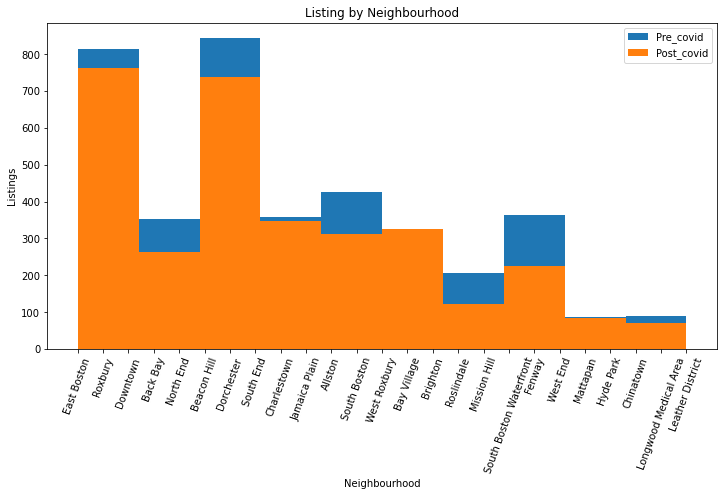

In [21]:
Pre_covid_nb = bos_pre19['neighbourhood_cleansed']
Post_covid_nb = bos_pos19['neighbourhood_cleansed']

#bins = numpy.linspace(-10, 10, 100)

plt.figure(figsize = (12, 6))

plt.hist(Pre_covid_nb, label='Pre_covid')
plt.hist(Post_covid_nb, label='Post_covid')
plt.title('Listing by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.xticks(rotation='70')
plt.ylabel('Listings')
plt.legend(loc='upper right')
plt.show()

#plt.savefig("../charts/title_length_hist.png")
#plt.savefig(title_length_hist, dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

## Deciding columns to keep for the first EDA pass-through and modeling

### There are two neighborhood columns 
- ['neighbourhood'] vs. ['neighbourhood_cleansed']
- Which one to keep?
    - I originally wanted to keep ['neighbourhood'] 
        - Can't do because the value in post19 dataset are very different from pre19 dataset
        - post19 data do not have good granilarity to work on 
    - Keep ['neighbourhood_cleansed'] from both dataset

In [22]:
bos_pre19['neighbourhood'].value_counts().sort_index()

Allston-Brighton      401
Back Bay              326
Beacon Hill           147
Brookline               3
Cambridge               3
Charlestown            74
Chestnut Hill           1
Chinatown              75
Dorchester            458
Downtown              257
Downtown Crossing      36
East Boston           173
Fenway/Kenmore        220
Financial District     13
Government Center       3
Harvard Square          1
Hyde Park              37
Jamaica Plain         281
Leather District        1
Mattapan               48
Mission Hill          137
Newton                  1
North End             101
Roslindale             70
Roxbury               271
Somerville              2
South Boston          286
South End             247
Theater District       32
West End              103
West Roxbury           37
Name: neighbourhood, dtype: int64

In [23]:
bos_pre19['neighbourhood_cleansed'].value_counts().sort_index()

Allston                    205
Back Bay                   250
Bay Village                 68
Beacon Hill                136
Brighton                   203
Charlestown                 76
Chinatown                   80
Dorchester                 465
Downtown                   374
East Boston                173
Fenway                     215
Hyde Park                   37
Jamaica Plain              282
Leather District             3
Longwood Medical Area        7
Mattapan                    49
Mission Hill               136
North End                  102
Roslindale                  69
Roxbury                    267
South Boston               220
South Boston Waterfront     65
South End                  242
West End                    83
West Roxbury                38
Name: neighbourhood_cleansed, dtype: int64

In [24]:
bos_pos19['neighbourhood'].value_counts().sort_index()

88 Auckland Street, Apt 1, Dorchester, MA 0212, Massachusetts, United States       1
BOSTON, Massachusetts, United States                                               4
Boston (Jamaica Plain), Massachusetts, United States                               1
Boston , Massachusetts, United States                                              6
Boston, , Massachusetts, United States                                             1
Boston, Allston, Ma, United States                                                 1
Boston, Massachusetts, United States                                            2158
Boston/Charlestown , Massachusetts, United States                                  1
Brighton, Massachusetts, United States                                             3
Brookline, Massachusetts, United States                                           16
Cambridge, Massachusetts, United States                                            1
Charlestown, Massachusetts, United States                        

In [25]:
bos_pos19['neighbourhood_cleansed'].value_counts().sort_index()

Allston                    160
Back Bay                   195
Bay Village                 45
Beacon Hill                139
Brighton                   246
Charlestown                 86
Chinatown                   59
Dorchester                 400
Downtown                   336
East Boston                194
Fenway                     126
Hyde Park                   39
Jamaica Plain              262
Leather District             2
Longwood Medical Area       11
Mattapan                    44
Mission Hill                61
North End                   68
Roslindale                  61
Roxbury                    233
South Boston               152
South Boston Waterfront     63
South End                  200
West End                    36
West Roxbury                36
Name: neighbourhood_cleansed, dtype: int64

### Original keep columns:
- Keep most numeric columns that are commonly exist in both dataset
- Keep id, name, and ametities
- Had to remove 'cleaning_fee', 'is_business_travel_ready', 'cancellation_policy'
    - Not in post19 dataset

keep_columns = ['id', 'name', 
                'host_is_superhost', 'host_identity_verified',
                'neighbourhood_cleansed', 
                'property_type', 'room_type',
                'accommodates', 'bathrooms', 'bedrooms',
                'beds', 'bed_type', 'amenities_dict', 'price', 'cleaning_fee',
                'is_business_travel_ready', 'cancellation_policy', 'dataset']

In [30]:
pre_keep_columns = ['name', 
                'host_is_superhost', 'host_identity_verified',
                'neighbourhood_cleansed', 
                'property_type', 'room_type',
                'accommodates', 'bedrooms',
                'beds', 'amenities_dict', 'price','dataset', 
                'availability_30', 'availability_60', 'availability_90', 'availability_365']

In [29]:
pos_keep_columns = ['name', 
                'host_is_superhost', 'host_identity_verified',
                'neighbourhood_cleansed', 
                'property_type', 'room_type',
                'accommodates', 'bedrooms',
                'beds', 'amenities', 'price','dataset',
                'availability_30', 'availability_60', 'availability_90', 'availability_365']

In [31]:
pre_to_keep = bos_pre19[pre_keep_columns]

In [32]:
pre_to_keep.head(2)

,name,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,amenities_dict,price,dataset,availability_30,availability_60,availability_90,availability_365
id,,,,,,,,,,,,,,,,
3781,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$125.00,pre-covid,11,20,20,97
5506,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$145.00,pre-covid,1,14,44,307


In [33]:
pre_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 3781 to 43176358
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3845 non-null   object 
 1   host_is_superhost       3845 non-null   object 
 2   host_identity_verified  3845 non-null   object 
 3   neighbourhood_cleansed  3845 non-null   object 
 4   property_type           3845 non-null   object 
 5   room_type               3845 non-null   object 
 6   accommodates            3845 non-null   int64  
 7   bedrooms                3841 non-null   float64
 8   beds                    3825 non-null   float64
 9   amenities_dict          3845 non-null   object 
 10  price                   3845 non-null   object 
 11  dataset                 3845 non-null   object 
 12  availability_30         3845 non-null   int64  
 13  availability_60         3845 non-null   int64  
 14  availability_90         3845 non-

In [34]:
pre_to_keep.rename(columns = {'amenities_dict': 'amenities'}, inplace=True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
pre_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 3781 to 43176358
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3845 non-null   object 
 1   host_is_superhost       3845 non-null   object 
 2   host_identity_verified  3845 non-null   object 
 3   neighbourhood_cleansed  3845 non-null   object 
 4   property_type           3845 non-null   object 
 5   room_type               3845 non-null   object 
 6   accommodates            3845 non-null   int64  
 7   bedrooms                3841 non-null   float64
 8   beds                    3825 non-null   float64
 9   amenities               3845 non-null   object 
 10  price                   3845 non-null   object 
 11  dataset                 3845 non-null   object 
 12  availability_30         3845 non-null   int64  
 13  availability_60         3845 non-null   int64  
 14  availability_90         3845 non-

In [36]:
post_to_keep = bos_pos19[pos_keep_columns]

In [37]:
post_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 3781 to 46025053
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3254 non-null   object 
 1   host_is_superhost       3254 non-null   object 
 2   host_identity_verified  3254 non-null   object 
 3   neighbourhood_cleansed  3254 non-null   object 
 4   property_type           3254 non-null   object 
 5   room_type               3254 non-null   object 
 6   accommodates            3254 non-null   int64  
 7   bedrooms                2844 non-null   float64
 8   beds                    3238 non-null   float64
 9   amenities               3254 non-null   object 
 10  price                   3254 non-null   object 
 11  dataset                 3254 non-null   object 
 12  availability_30         3254 non-null   int64  
 13  availability_60         3254 non-null   int64  
 14  availability_90         3254 non-

## Combine two datasets for cleaning and EDA

In [38]:
df = pd.concat([pre_to_keep, post_to_keep])

In [39]:
df.head(1)

,name,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365
id,,,,,,,,,,,,,,,,
3781,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$125.00,pre-covid,11,20,20,97


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7099 entries, 3781 to 46025053
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    7099 non-null   object 
 1   host_is_superhost       7099 non-null   object 
 2   host_identity_verified  7099 non-null   object 
 3   neighbourhood_cleansed  7099 non-null   object 
 4   property_type           7099 non-null   object 
 5   room_type               7099 non-null   object 
 6   accommodates            7099 non-null   int64  
 7   bedrooms                6685 non-null   float64
 8   beds                    7063 non-null   float64
 9   amenities               7099 non-null   object 
 10  price                   7099 non-null   object 
 11  dataset                 7099 non-null   object 
 12  availability_30         7099 non-null   int64  
 13  availability_60         7099 non-null   int64  
 14  availability_90         7099 non-

In [41]:
df['dataset'].value_counts()

pre-covid     3845
post-covid    3254
Name: dataset, dtype: int64

Text(0, 0.5, 'case count')

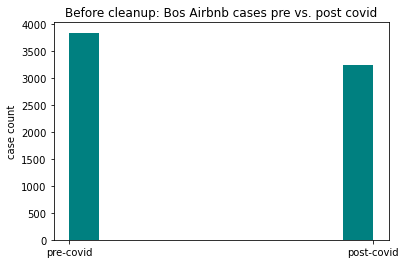

In [42]:
plt.hist(df['dataset'], color='teal');
plt.title('Before cleanup: Bos Airbnb cases pre vs. post covid')
plt.ylabel('case count')

## Handle nan data

In [43]:
df.isnull().sum()

name                        0
host_is_superhost           0
host_identity_verified      0
neighbourhood_cleansed      0
property_type               0
room_type                   0
accommodates                0
bedrooms                  414
beds                       36
amenities                   0
price                       0
dataset                     0
availability_30             0
availability_60             0
availability_90             0
availability_365            0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7099 entries, 3781 to 46025053
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    7099 non-null   object 
 1   host_is_superhost       7099 non-null   object 
 2   host_identity_verified  7099 non-null   object 
 3   neighbourhood_cleansed  7099 non-null   object 
 4   property_type           7099 non-null   object 
 5   room_type               7099 non-null   object 
 6   accommodates            7099 non-null   int64  
 7   bedrooms                6685 non-null   float64
 8   beds                    7063 non-null   float64
 9   amenities               7099 non-null   object 
 10  price                   7099 non-null   object 
 11  dataset                 7099 non-null   object 
 12  availability_30         7099 non-null   int64  
 13  availability_60         7099 non-null   int64  
 14  availability_90         7099 non-

In [45]:
df.to_csv('./data/bos_columns_wanted_availability.csv', index=False)

In [46]:
df = pd.read_csv('./data/bos_columns_wanted_availability.csv')

In [47]:
df.head()

,name,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365
0,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$125.00,pre-covid,11,20,20,97
1,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$145.00,pre-covid,1,14,44,307
2,$99 Special!! Home Away! Condo,t,t,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$169.00,pre-covid,1,4,19,266
3,Curved Glass Studio/1bd facing Park,t,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$99.00,pre-covid,17,42,42,290
4,Bright 1bed facing Golden Dome,t,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",$150.00,pre-covid,28,29,29,42


### Clean up price column:
- remove $
- remove ,
- turn the column into float

In [48]:
#df['Title'] = [each.split(',')[1].split('.')[0].strip() for each in df['Name']]

df['price'] = [each.strip('$') for each in df['price']]

In [49]:
df['price'].head()

0    125.00
1    145.00
2    169.00
3     99.00
4    150.00
Name: price, dtype: object

In [50]:
# reference https://www.reddit.com/r/learnpython/comments/5ktuhv/how_do_i_remove_commas_from_data_frame_column/
df["price"] = df["price"].str.replace(",","").astype(float)

In [51]:
df.groupby('dataset')['price'].mean()

dataset
post-covid    161.303934
pre-covid     182.451235
Name: price, dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7099 entries, 0 to 7098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    7099 non-null   object 
 1   host_is_superhost       7099 non-null   object 
 2   host_identity_verified  7099 non-null   object 
 3   neighbourhood_cleansed  7099 non-null   object 
 4   property_type           7099 non-null   object 
 5   room_type               7099 non-null   object 
 6   accommodates            7099 non-null   int64  
 7   bedrooms                6685 non-null   float64
 8   beds                    7063 non-null   float64
 9   amenities               7099 non-null   object 
 10  price                   7099 non-null   float64
 11  dataset                 7099 non-null   object 
 12  availability_30         7099 non-null   int64  
 13  availability_60         7099 non-null   int64  
 14  availability_90         7099 non-null   

### binarize categorize columns

In [53]:
df.head(2)

,name,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365
0,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",125.0,pre-covid,11,20,20,97
1,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",145.0,pre-covid,1,14,44,307


In [54]:
df['host_is_superhost'].value_counts()

f    4891
t    2208
Name: host_is_superhost, dtype: int64

In [55]:
# df[‘outcome’] = np.where(smoking[‘outcome’] == ‘Dead’, 1, 0)
df['superhost'] = np.where(df['host_is_superhost'] == 't', 1, 0)

In [56]:
df['superhost'].value_counts()

0    4891
1    2208
Name: superhost, dtype: int64

In [57]:
df['host_identity_verified'].value_counts()

t    4062
f    3037
Name: host_identity_verified, dtype: int64

In [58]:
# df[‘outcome’] = np.where(smoking[‘outcome’] == ‘Dead’, 1, 0)
df['id_verified'] = np.where(df['host_identity_verified'] == 't', 1, 0)

In [59]:
df['id_verified'].value_counts()

1    4062
0    3037
Name: id_verified, dtype: int64

In [60]:
df.head(2)

,name,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified
0,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",125.0,pre-covid,11,20,20,97,1,0
1,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",145.0,pre-covid,1,14,44,307,1,1


### Dummify neighborhodd column

In [61]:
df.rename(columns = {'neighbourhood_cleansed': 'nb', 'room_type': 'room', 'property_type':'property' }, inplace=True)

In [62]:
dummies = pd.get_dummies(df[['nb', 'room', 'property']], drop_first = True)

In [63]:
dummies.head()

,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
df_all = pd.concat([df, dummies], axis = 1)

In [65]:
df_all.head(2)

,name,host_is_superhost,host_identity_verified,nb,property,room,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
0,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",125.0,pre-covid,11,20,20,97,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",145.0,pre-covid,1,14,44,307,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df_all.isnull().sum()

name                                            0
host_is_superhost                               0
host_identity_verified                          0
nb                                              0
property                                        0
room                                            0
accommodates                                    0
bedrooms                                      414
beds                                           36
amenities                                       0
price                                           0
dataset                                         0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
superhost                                       0
id_verified                                     0
nb_Back Bay                                     0
nb_Bay Village                                  0


In [67]:
414 / df.shape[0]

0.05831807296802367

In [68]:
df_all[df_all['bedrooms'].isnull() & df['beds'].isnull()]

,name,host_is_superhost,host_identity_verified,nb,property,room,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
3592,Boston Fenway Inn,f,f,Fenway,Hostel,Hotel room,1,NaN,NaN,"{'TV': 0, 'Cable TV': 0, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 0, 'Dryer': 0, 'Smoke detector': 1, 'Carbo...",0.0,pre-covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6316,The Revolution Hotel,t,t,South End,Room in hotel,Hotel room,4,NaN,NaN,"[""Bed sheets and pillows"", ""Bluetooth speaker"", ""Smoke alarm"", ""TV"", ""Laundry services"", ""First aid kit"", ""Hangers"", ""Carbon monoxide alarm"", ""House bikes"", ""Luggage dropoff allowed"", ""Safe"", ""Pet...",0.0,post-covid,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6361,Boston Fenway Inn,t,t,Fenway,Room in hostel,Hotel room,1,NaN,NaN,"[""Bed sheets and pillows"", ""Hangers"", ""Carbon monoxide alarm"", ""Air conditioning"", ""Fire extinguisher"", ""Free wifi"", ""Heating"", ""Complimentary breakfast"", ""Limited housekeeping \u2014 "", ""Toiletri...",0.0,post-covid,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
df_all[df_all['price']==0]

,name,host_is_superhost,host_identity_verified,nb,property,room,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
1325,"Walk To The Beach or City, room 7",f,f,Dorchester,House,Private room,3,1.0,1.0,"{'TV': 0, 'Cable TV': 0, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 0, 'Dryer': 0, 'Smoke detector': 1, 'Carbo...",0.0,pre-covid,28,58,88,353,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3527,(H5) Modern- near old north church,f,f,North End,Apartment,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 0, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 0, 'Dryer': 0, 'Smoke detector': 1, 'Carbo...",0.0,pre-covid,28,58,88,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3592,Boston Fenway Inn,f,f,Fenway,Hostel,Hotel room,1,NaN,NaN,"{'TV': 0, 'Cable TV': 0, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 0, 'Dryer': 0, 'Smoke detector': 1, 'Carbo...",0.0,pre-covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6316,The Revolution Hotel,t,t,South End,Room in hotel,Hotel room,4,NaN,NaN,"[""Bed sheets and pillows"", ""Bluetooth speaker"", ""Smoke alarm"", ""TV"", ""Laundry services"", ""First aid kit"", ""Hangers"", ""Carbon monoxide alarm"", ""House bikes"", ""Luggage dropoff allowed"", ""Safe"", ""Pet...",0.0,post-covid,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6361,Boston Fenway Inn,t,t,Fenway,Room in hostel,Hotel room,

In [70]:
df_all.drop(df_all[df_all['price'] == 0].index, inplace = True) 

In [71]:
df_all[df_all['price']==0]

,name,host_is_superhost,host_identity_verified,nb,property,room,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa


In [72]:
df_all.shape

(7094, 99)

In [73]:
df_all.isnull().sum()

name                                            0
host_is_superhost                               0
host_identity_verified                          0
nb                                              0
property                                        0
room                                            0
accommodates                                    0
bedrooms                                      411
beds                                           33
amenities                                       0
price                                           0
dataset                                         0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
superhost                                       0
id_verified                                     0
nb_Back Bay                                     0
nb_Bay Village                                  0


In [74]:
df_all.groupby('dataset')['bedrooms'].value_counts()

dataset     bedrooms
post-covid  1.0         2007
            2.0          552
            3.0          188
            4.0           73
            5.0           17
            6.0            4
            7.0            2
            13.0           1
pre-covid   1.0         2346
            2.0          686
            0.0          446
            3.0          238
            4.0           87
            5.0           28
            6.0            3
            7.0            3
            8.0            1
            13.0           1
Name: bedrooms, dtype: int64

In [75]:
df_all.dropna(inplace=True)

In [76]:
df_all.isnull().sum()

name                                          0
host_is_superhost                             0
host_identity_verified                        0
nb                                            0
property                                      0
room                                          0
accommodates                                  0
bedrooms                                      0
beds                                          0
amenities                                     0
price                                         0
dataset                                       0
availability_30                               0
availability_60                               0
availability_90                               0
availability_365                              0
superhost                                     0
id_verified                                   0
nb_Back Bay                                   0
nb_Bay Village                                0
nb_Beacon Hill                          

In [77]:
df_all.groupby('dataset')['bedrooms'].value_counts()

dataset     bedrooms
post-covid  1.0         1993
            2.0          552
            3.0          188
            4.0           73
            5.0           17
            6.0            4
            7.0            2
            13.0           1
pre-covid   1.0         2329
            2.0          685
            0.0          446
            3.0          237
            4.0           87
            5.0           28
            6.0            3
            7.0            3
            8.0            1
            13.0           1
Name: bedrooms, dtype: int64

In [78]:
df_all.shape

(6650, 99)

In [79]:
df_all.reset_index(drop = True, inplace = True)

In [80]:
df_all.to_csv('./data/bos_cleaned_allcolumns.csv', index=False)

In [81]:
df_all.columns

Index(['name', 'host_is_superhost', 'host_identity_verified', 'nb', 'property',
       'room', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'dataset', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'superhost', 'id_verified', 'nb_Back Bay',
       'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton', 'nb_Charlestown',
       'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown', 'nb_East Boston',
       'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain', 'nb_Leather District',
       'nb_Longwood Medical Area', 'nb_Mattapan', 'nb_Mission Hill',
       'nb_North End', 'nb_Roslindale', 'nb_Roxbury', 'nb_South Boston',
       'nb_South Boston Waterfront', 'nb_South End', 'nb_West End',
       'nb_West Roxbury', 'room_Hotel room', 'room_Private room',
       'room_Shared room', 'property_Apartment', 'property_Barn',
       'property_Bed and breakfast', 'property_Boat',
       'property_Boutique hotel', 'property_Bungalow', 'property_Castle',
    

In [82]:
df_num = df_all.drop(columns = ['name', 'host_is_superhost', 'host_identity_verified', 'nb', 'property', 'room', 'amenities'])

In [83]:
df_num.to_csv('./data/bos_cleaned_num_columns.csv', index=False)

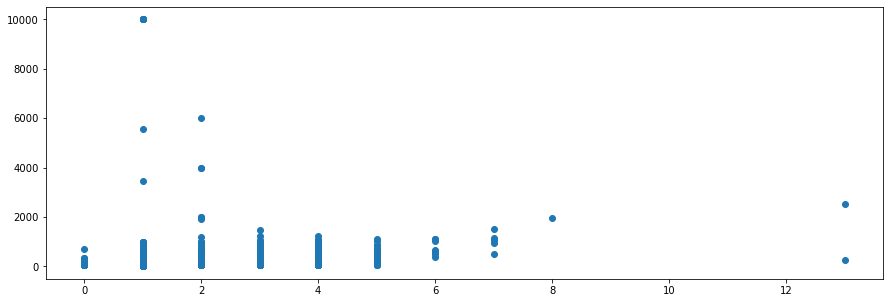

In [84]:
plt.figure(figsize = (15, 5))
plt.scatter(df['bedrooms'], df['price']);

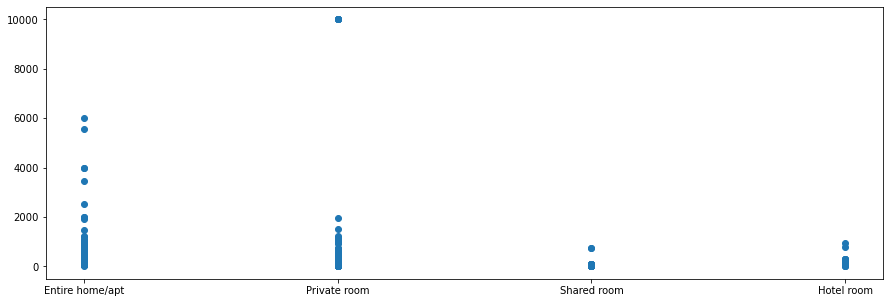

In [85]:
plt.figure(figsize = (15, 5))
plt.scatter(df['room'], df['price']);

In [86]:
df_all['dataset'].value_counts()

pre-covid     3820
post-covid    2830
Name: dataset, dtype: int64

In [87]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 99 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   name                                        6650 non-null   object 
 1   host_is_superhost                           6650 non-null   object 
 2   host_identity_verified                      6650 non-null   object 
 3   nb                                          6650 non-null   object 
 4   property                                    6650 non-null   object 
 5   room                                        6650 non-null   object 
 6   accommodates                                6650 non-null   int64  
 7   bedrooms                                    6650 non-null   float64
 8   beds                                        6650 non-null   float64
 9   amenities                                   6650 non-null   object 
 10  price       

In [82]:
df_all.isnull().sum()

id                                            0
name                                          0
host_is_superhost                             0
host_identity_verified                        0
nb                                            0
property                                      0
room                                          0
accommodates                                  0
bedrooms                                      0
beds                                          0
amenities                                     0
price                                         0
dataset                                       0
availability_30                               0
availability_60                               0
availability_90                               0
availability_365                              0
superhost                                     0
id_verified                                   0
nb_Back Bay                                   0
nb_Bay Village                          

<font size=5, color=blue><b>Keeping the code reference below to process amenitie column later.</b></font> 

## Code to binarize ['amenities_dict']
- df['amenities'] = df['amenities_dict'].apply(lambda x : dict(eval(x)))
- amenities = df['amenities'].apply(pd.Series )

## Code reference to turn amenities list into binary columns:
-  [stackoverflow](https://stackoverflow.com/questions/53825184/split-a-pandas-dataframe-column-into-onehot-binary-columns)

In [ ]:
from ast import literal_eval

In [ ]:
# parse the lists of activities (which are still strings)
#acts = df['activities'].apply(literal_eval)

amenities_oct = df_oct20['amenities'].apply(literal_eval)
amenities_oct

In [ ]:
# get the unique activities
amt_cols = np.unique([a for al in acts for a in al])

# assemble the desired one hot array from the activities
actarr = np.array([np.in1d(actcols, al) for al in acts])
actdf = pd.DataFrame(actarr, columns=actcols)

In [ ]:
# parse the lists of activities (which are still strings)
amenities_oct = df_oct20['amenities'].apply(literal_eval)

# get the unique activities
actcols = np.unique([a for al in acts for a in al])

# assemble the desired one hot array from the activities
actarr = np.array([np.in1d(actcols, al) for al in acts])
actdf = pd.DataFrame(actarr, columns=actcols)

In [ ]:
df.head(1)

#for genre in frozenset.union(*df.genre):
#    df[genre] = df.apply(lambda _: int(genre in _.genre), axis=1)

for item in df_oct20.amenities:
    df_oct20[item] = df_oct20.apply(lambda _: int(item in _.amenities), axis=1)

In [3]:
bos_316 = pd.read_csv('./data/bos_0316.csv')
bos_316.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200316134736,2020-03-16,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...","This is a totally separate apartment located on the first floor of a 3 story building. Apartment has one bedroom with queen sized bed plus full eat-in kitchen,sitting room and full bath with tub/s...","Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped ...",none,"Mostly quiet ( no loud music, no crowed sidewalks) area with residential 3 story buildings, some 4 and 5 story newer buildings. Though not in an ""entertainment"" area there are local food shops an...","Building is on quiet side of airport. Building is not under a flight path, most of the time planes take off and land over the harbor not on land side of airport.","Local subway stop ( Maverick Station on the Blue Line) is one stop from Faneuil Hall and financial district. Boston subway is easy to manage, connections to all of Boston and Cambridge. Maverick S...",Guests solely occupy the 1 floor apartment with its own front entrance off common hallway and private back door opening to gated parking area.,We sometimes travel. Always available via: mobile phone (voice and texting) and internet. Backup contact provided when not available.,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de0442_original.jpg?aki_policy=large,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently occupy the spaces that we rent and as such try to make the spaces pleasant and appealing to ourselves as well as guests. We have been subletting for o...,within a few hours,100%,50%,t,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_x_medium,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42

In [8]:
bos_316.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(23), object(63)
memory usage: 3.1+ MB


In [9]:
bos_316.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
summary                                           80
space                                            684
description                                       45
experiences_offered                                0
neighborhood_overview                            974
notes                                           1193
transit                                         1379
access                                          1605
interaction                                     1201
house_rules                                      930
thumbnail_url                                   3799
medium_url                                      3799
picture_url                                        0
xl_picture_url                                

In [10]:
bos_316.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)